# Initial Data Exploration
Data quality is the most important driver for success in any data science project. So, in this task we will address data quality from the beginning. 
- Data Loading
- Explore the dataset
- Identify quality issues (e.g. missing values, wrong measurements, …)
- Assess feature quality – how relevant is a certain measurement (e.g. use correlation matrix)
- Get an idea on the value distribution of your data using statistical measures and visualization



In [252]:
import numpy as np
import pandas as pd
    

## Data Loading
The DataSet chosen is Census Income, also known as Adult Dataset, and it can be found at: https://archive.ics.uci.edu/dataset/20/census+income 


We are going to use this DataSet to predict weather an adult income exceeds $50K/yr based on census data.


In [253]:
df = pd.read_csv('census+income/adult.data', header = None)
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num','marital_status', 'occupation','relationship', 
              'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'wage_class']

df.columns = col_labels
df.head()



,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [254]:
df.info()
# We can see number of rows and columns
print(df.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  wage_class      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
(32561, 15)


We hace 13 features and a target column which is "wage_class"

## Identify quality issues (e.g. missing values, wrong measurements, …)

We want to identify null values, categorical and numerical columns

In [255]:
# Identify missing values
print(df.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64


In [256]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print(categorical_columns)

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'wage_class'],
      dtype='object')


In [257]:
numerical_columns = df.select_dtypes(include=['int', 'float']).columns
print(numerical_columns)

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')


## Assess feature quality – how relevant is a certain measurement (e.g. use correlation matrix)


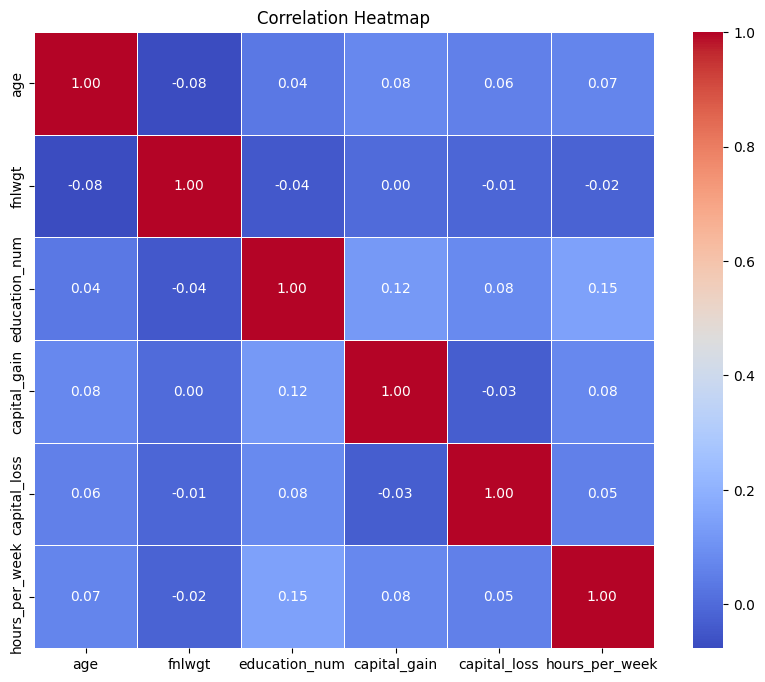

In [258]:
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Get an idea on the value distribution of our data using statistical measures and visualization

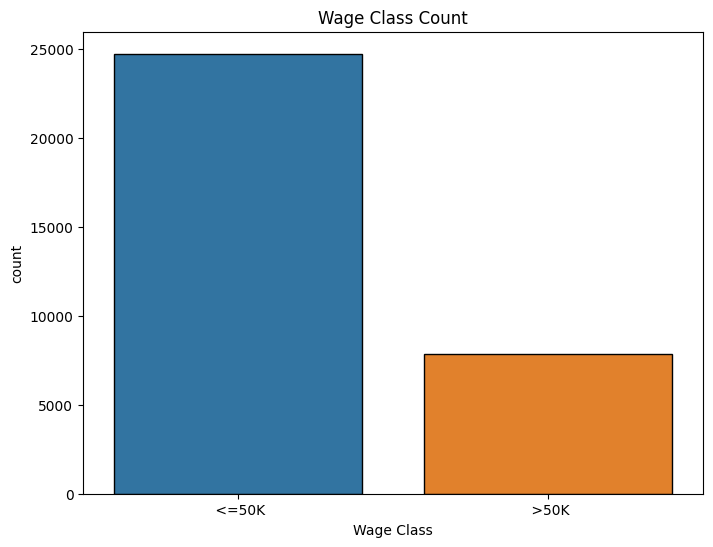

In [259]:

plt.figure(figsize=(8, 6))
sns.countplot(x='wage_class', hue='wage_class', edgecolor='k', data=df)
plt.title('Wage Class Count')
plt.xlabel('Wage Class')
plt.show()

<Axes: ylabel='count'>

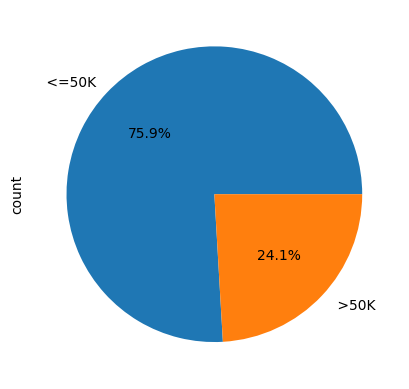

In [260]:
df["wage_class"].value_counts().plot.pie(autopct= '%1.1f%%')

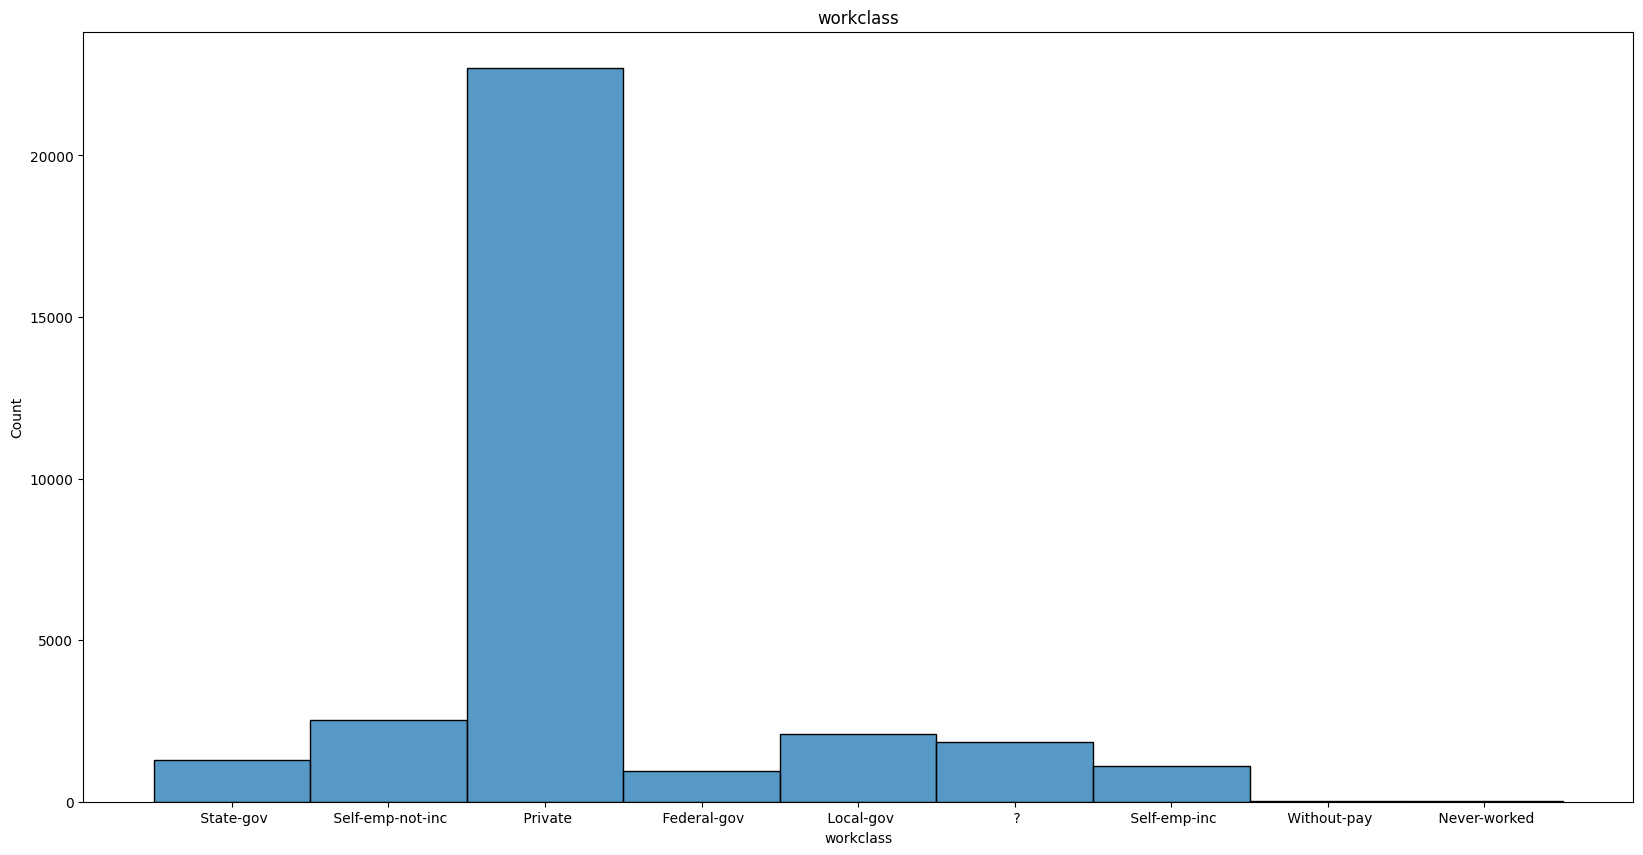

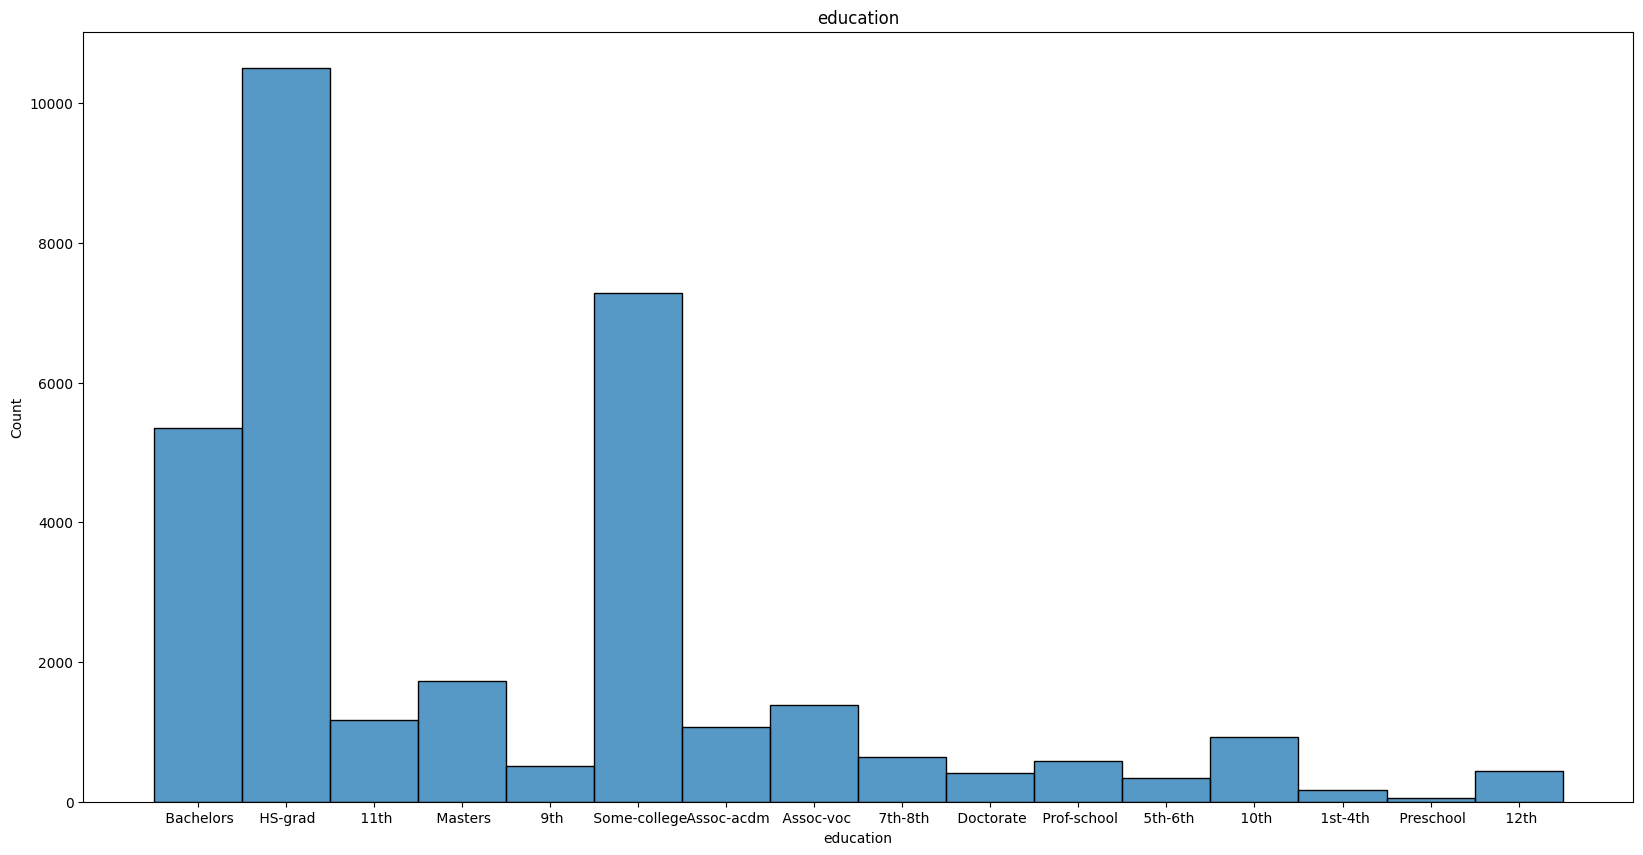

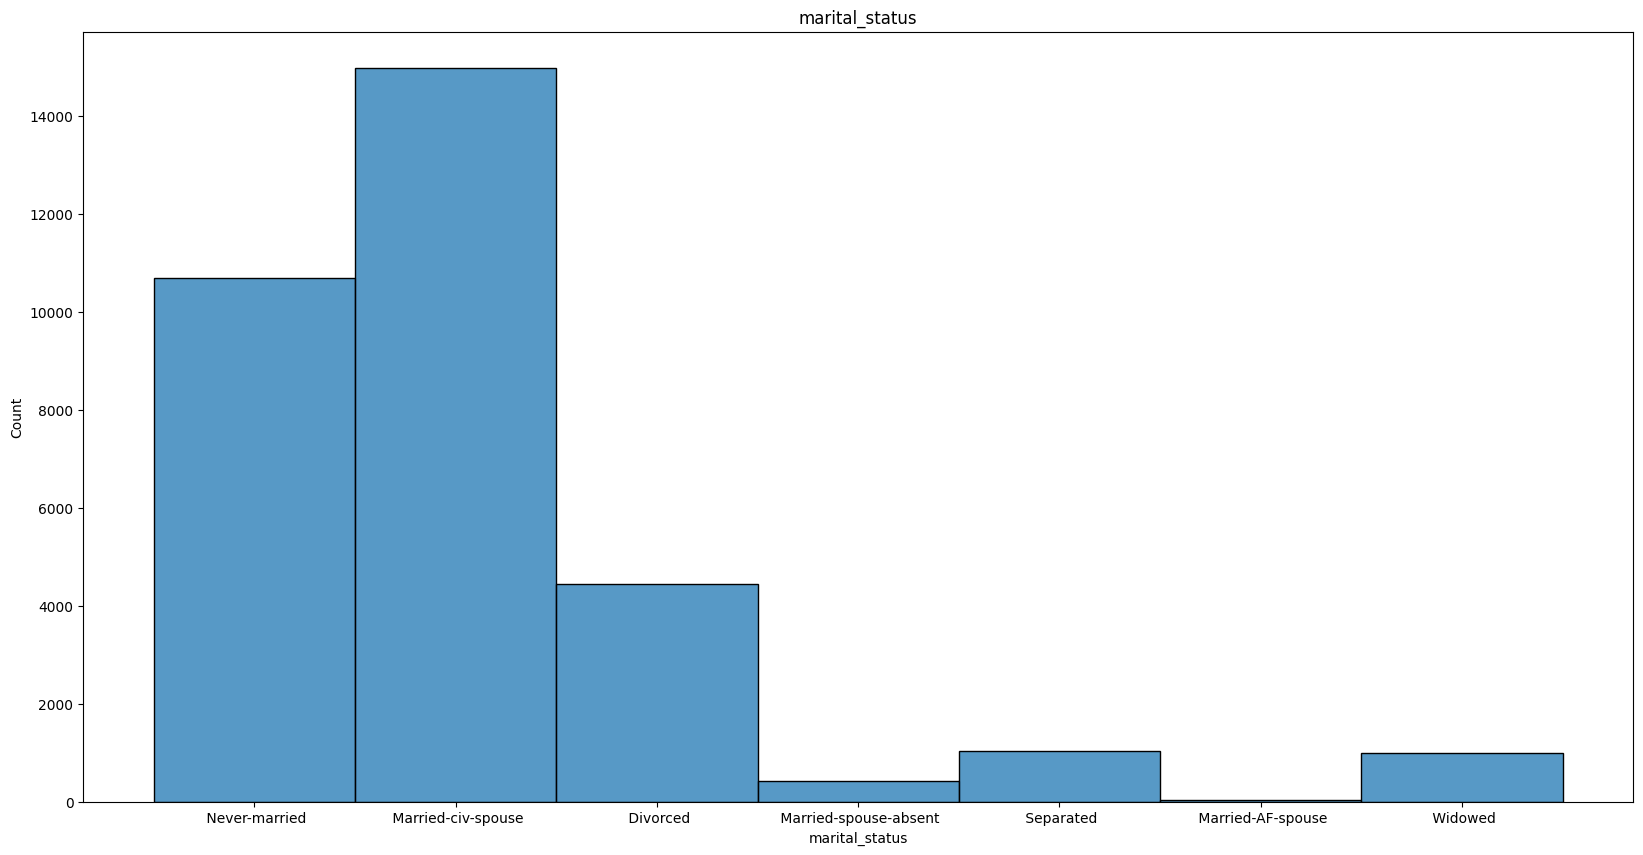

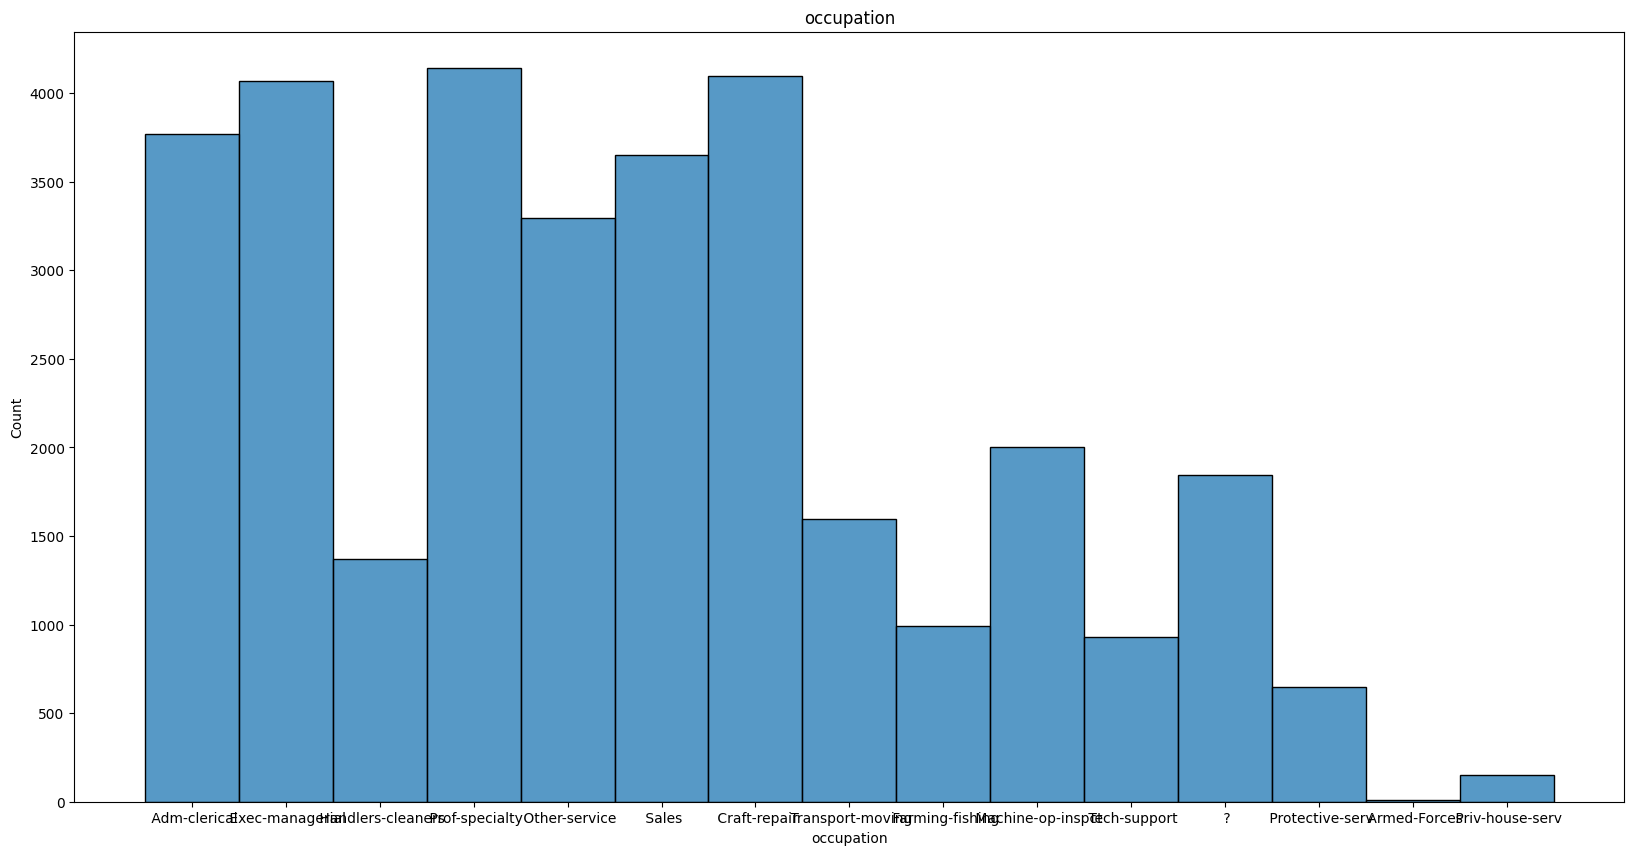

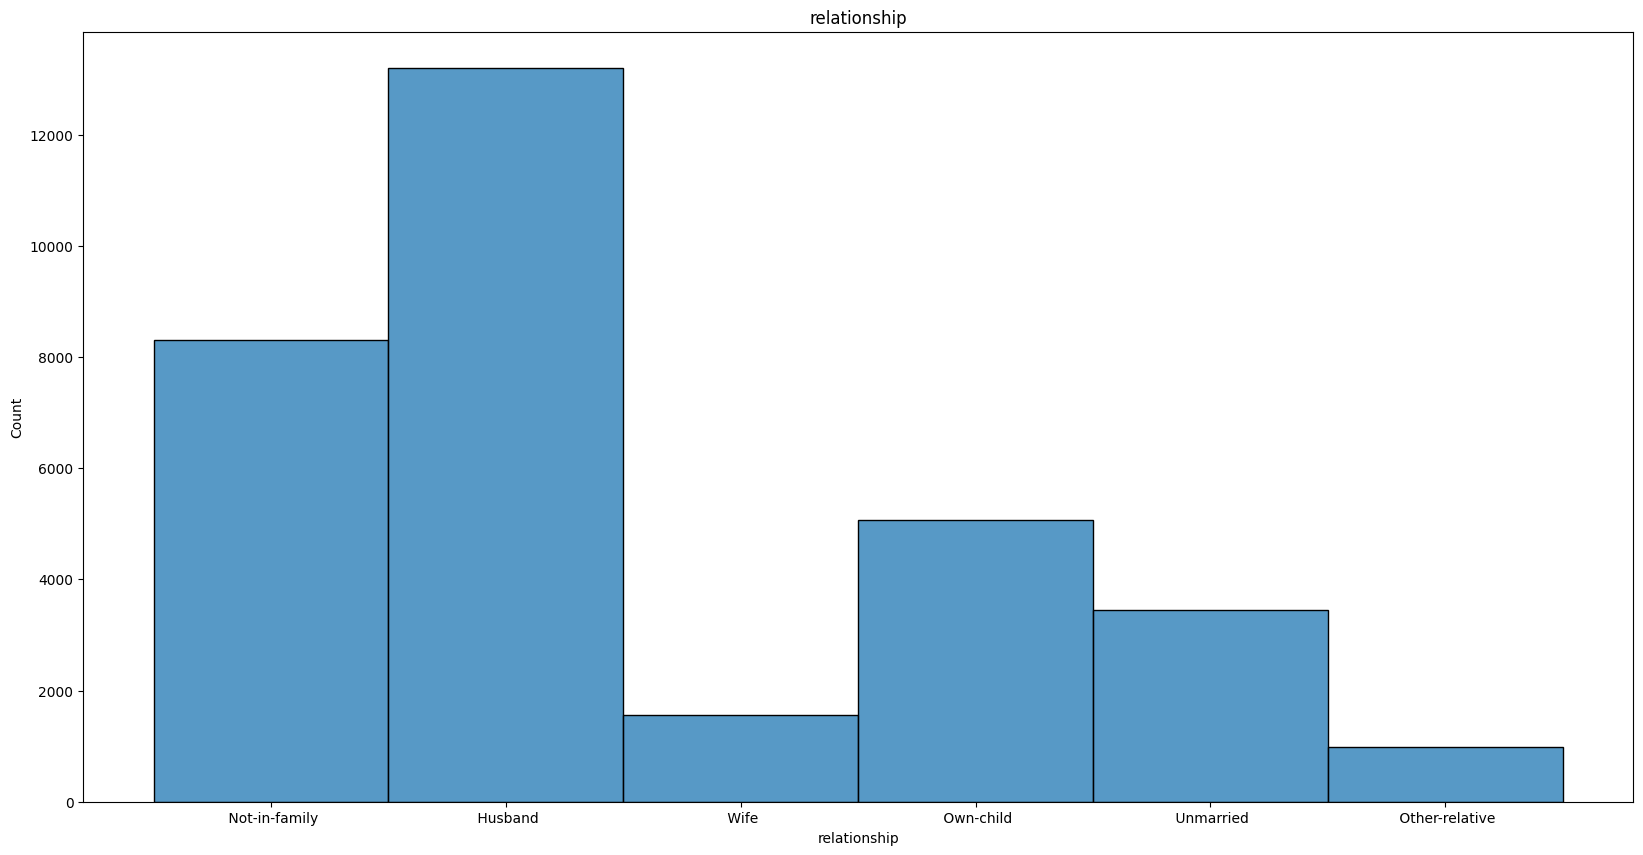

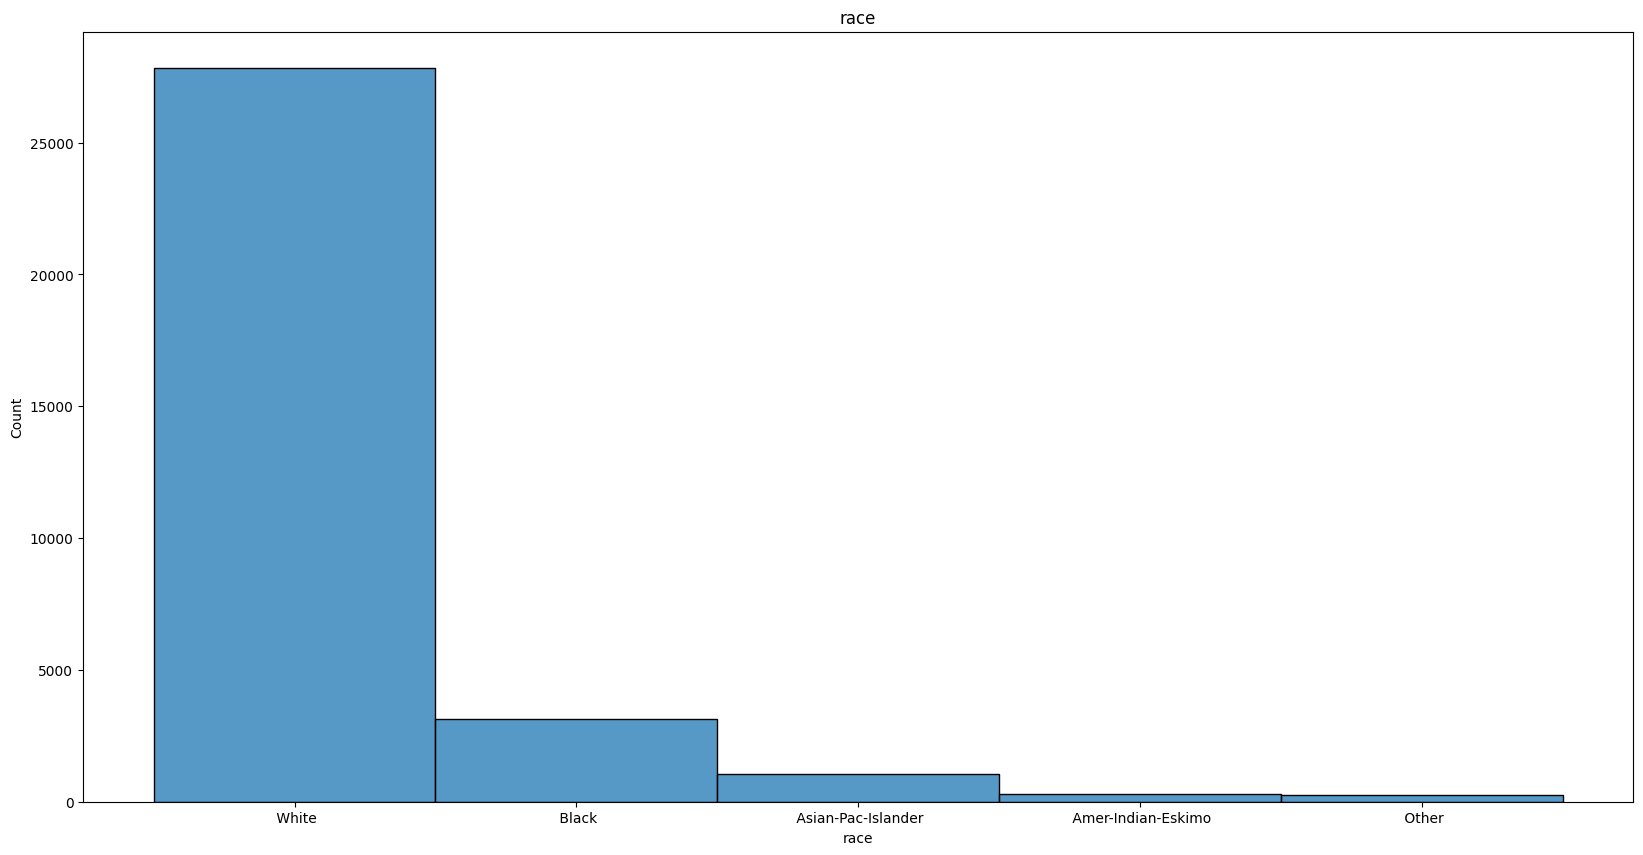

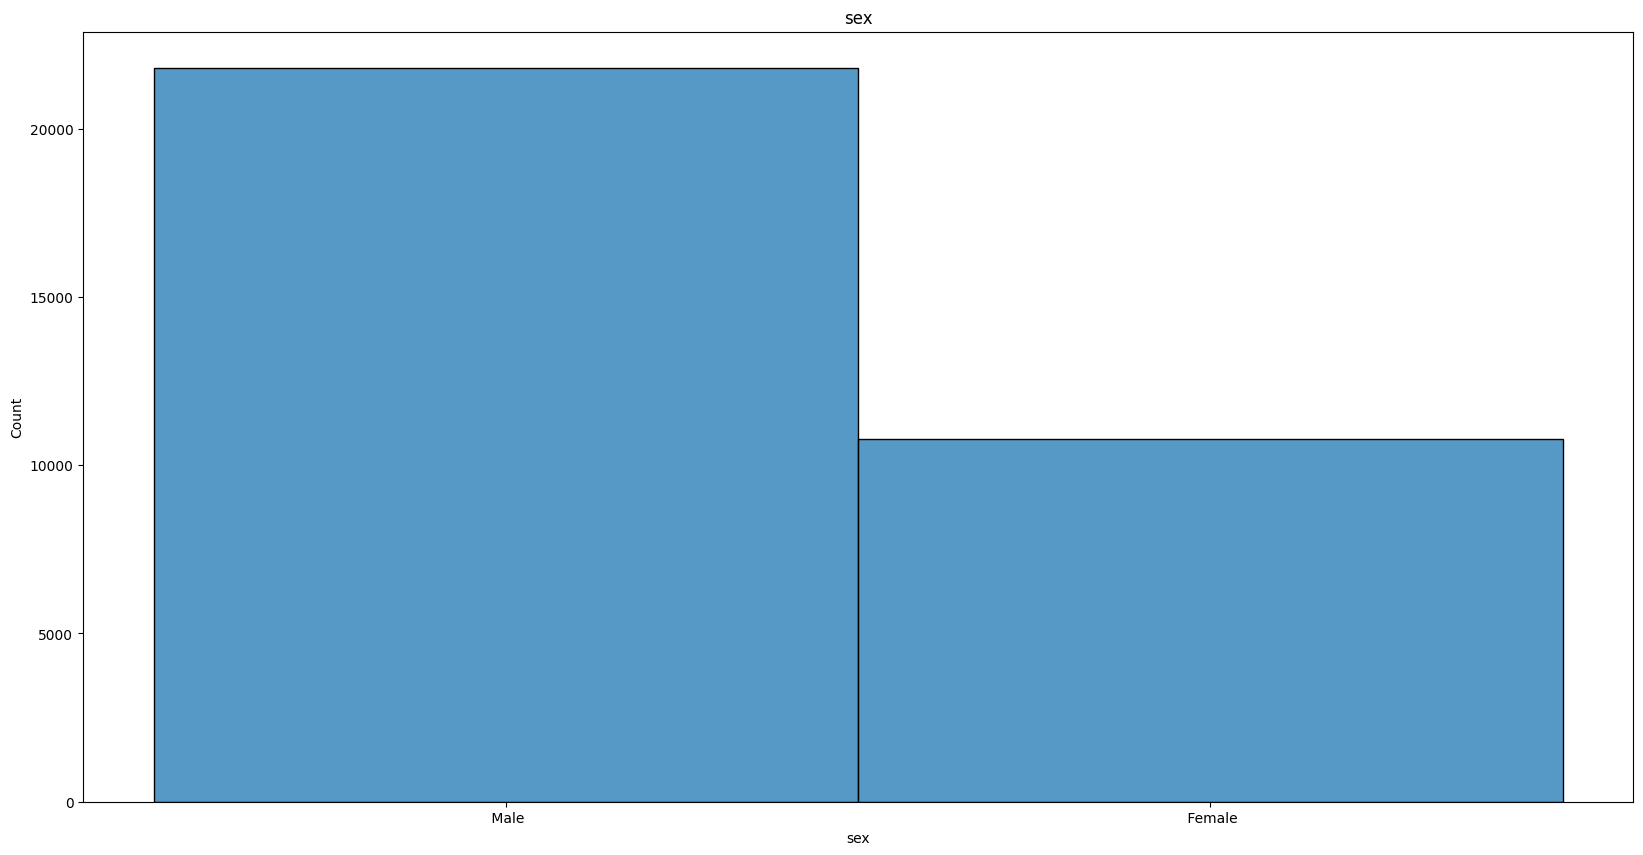

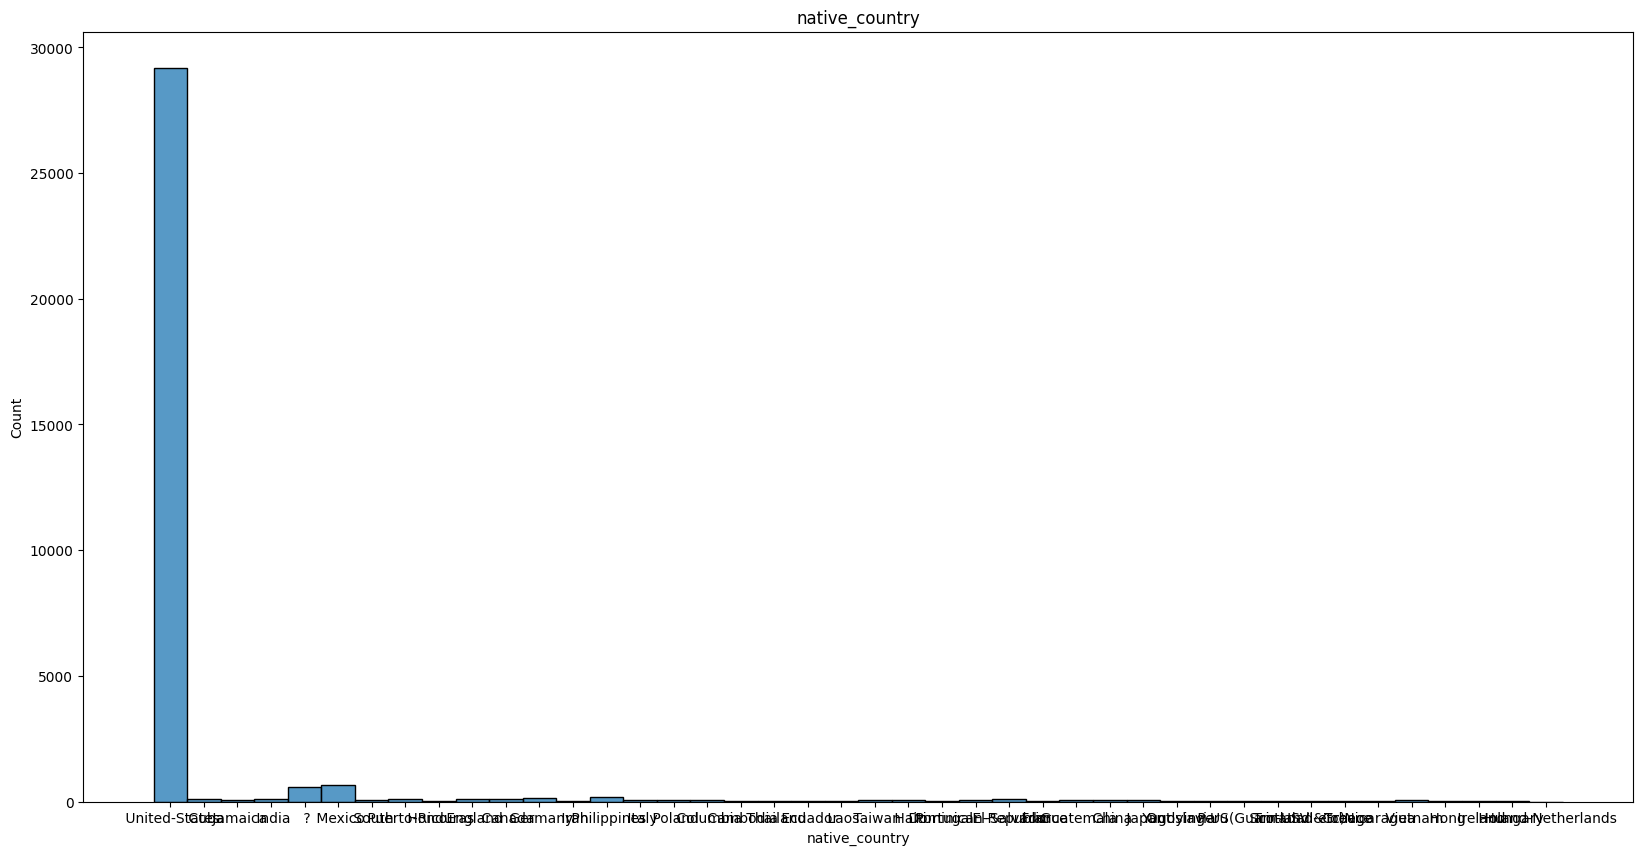

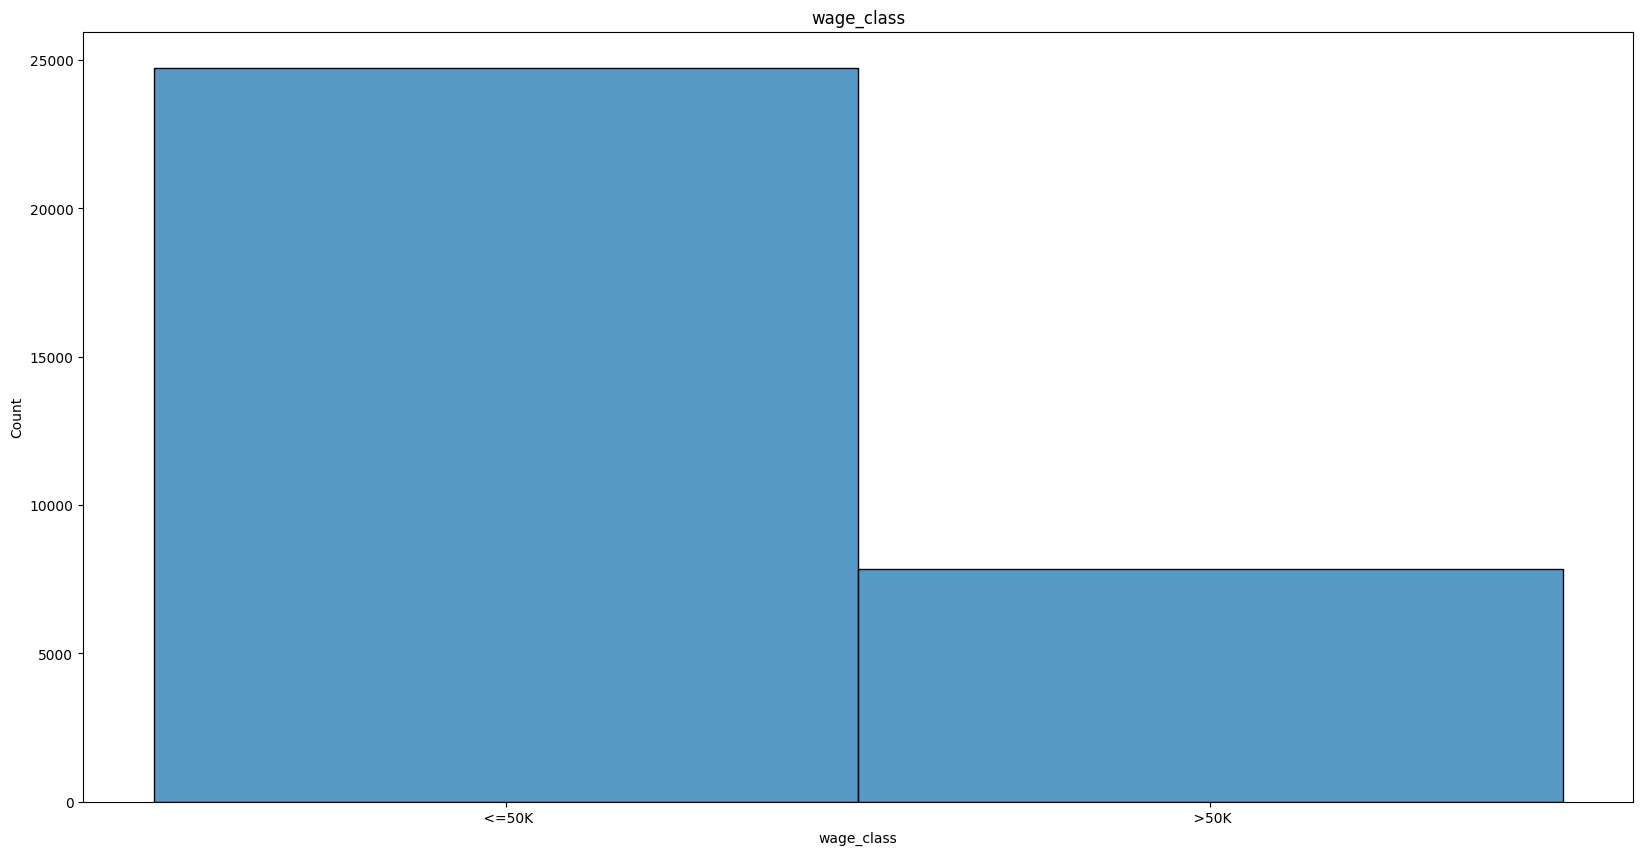

In [261]:
for cat in categorical_columns:
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
    sns.histplot(data=df, x=cat, kde=False, ax=ax)
    ax.set_title(cat)
    ax.set_xlabel(cat);

In [262]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## ETS
- Education and Education Num contains the same information, we can drop Education.
- We can see that almost all values in Native.country are USA. We can substitute USA to be 1 and other country to be 0. 

In [263]:
df_ets = df.drop("education", axis=1)
#Convert the 'country' feature to be 1 if the country is the United States; otherwise, set it to 0.
df_ets['native_country']=np.where(df_ets['native_country']==' United-States',1,0)
df_ets['native_country'] = df_ets['native_country'].astype(int)

# FEATURE ENGINEERING
- Use StandarScaler for numerical features
- Use LabelEncoder for target column wage_class
- Use OneHotEncoder for categorical features


In [264]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming df_ets is your DataFrame
X = df_ets.drop("wage_class", axis=1)
y = df_ets["wage_class"]

# Define categorical and numerical features
categorical_features = df_ets.select_dtypes(include=['object']).columns
categorical_features =categorical_features.drop("wage_class")
numerical_features = df_ets.select_dtypes(exclude=['object']).columns
target = ["wage_class"]
# Create transformers for preprocessing
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
label_encoder = Pipeline(steps=[('label_encoder', LabelEncoder())])
# Create a column transformer to apply transformers to specific feature types
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
        ])

# Create the final pipeline with preprocessing
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('label_encoder', LabelEncoder())])
transformed_data = pipeline.named_steps['preprocessor'].fit_transform(df_ets)
# Fit and transform the pipeline on the training data
X_transformed = pipeline.named_steps['preprocessor'].fit_transform(X)
y_encoded = pipeline.named_steps['label_encoder'].fit_transform(y)



# Split into training and test data

In [265]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed,y_encoded, test_size=0.2, random_state=0)

# Model Definition
For this pproject we need to use Supervised Learning algorithms. We want to do a binary classification to predict weather an adult income is over 50K or not

We will explore and compare results from different ML and DeepLearning algorithms:
- Gradient Boosting Classifier
- RandomForest Classifier
- XGBClassifier
- Logistic Regression
- KNN
- MLP (Keras)

## Traditional ML Algorithms

In [266]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

([<matplotlib.axis.XTick at 0x2e04ac460>,
 [Text(0, 0, '0'),
  Text(5, 0, '5'),
  Text(10, 0, '10'),
  Text(15, 0, '15'),
  Text(20, 0, '20'),
  Text(25, 0, '25'),
  Text(30, 0, '30'),
  Text(35, 0, '35'),
  Text(40, 0, '40')])

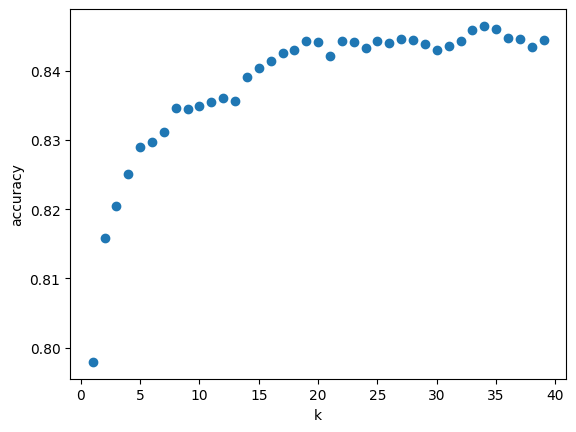

In [267]:
### KNN ###
# Selection of optimum K
k_range = range(1, 40)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20, 25, 30, 35, 40])

In [268]:
model_GBC=GradientBoostingClassifier()
model_GBC.fit(X_train, y_train)

model_RF = RandomForestClassifier()
model_RF.fit(X_train, y_train)

model_XGBC = xgb.XGBClassifier()
model_XGBC.fit(X_train, y_train)


model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)

model_KNN = KNeighborsClassifier(34)
model_KNN.fit(X_train, y_train)

/Users/gonzalotamariz-martelsanchez/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KNeighborsClassifier(n_neighbors=34)

In [269]:
from sklearn.metrics import classification_report

predictions_GBC_train = model_GBC.predict(X = X_train)
predictions_RF_train = model_RF.predict(X = X_train)
predictions_XGBC_train = model_XGBC.predict(X = X_train)
predictions_LR_train = model_LR.predict(X = X_train)
predictions_KNN_train= model_KNN.predict(X = X_train)
predictions_GBC = model_GBC.predict(X = X_test)
predictions_RF = model_RF.predict(X = X_test)
predictions_XGBC = model_XGBC.predict(X = X_test)
predictions_LR = model_LR.predict(X = X_test)
predictions_KNN = model_KNN.predict(X = X_test)


In [270]:

print("Gradient Boosting")
print("=================")
accuracy_train = accuracy_score(
            y_true    = y_train,
            y_pred    = predictions_GBC_train,
            normalize = True
           )
accuracy_test = accuracy_score(
            y_true    = y_test,
            y_pred    = predictions_GBC,
            normalize = True
           )
print("\n Accuracy in train 1s: {:.2f} %".format(100 * accuracy_train))
print("\n Accuracy in test 1s: {:.2f} %".format(100 * accuracy_test))
print(
    classification_report(
        y_true = y_test,
        y_pred = predictions_GBC
    )
)


Gradient Boosting

 Accuracy in train 1s: 87.14 %

 Accuracy in test 1s: 86.15 %
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      4918
           1       0.77      0.62      0.69      1595

    accuracy                           0.86      6513
   macro avg       0.83      0.78      0.80      6513
weighted avg       0.86      0.86      0.86      6513



In [271]:

print("Random Forest")
print("==============")
accuracy_train = accuracy_score(
            y_true    = y_train,
            y_pred    = predictions_RF_train,
            normalize = True
           )
accuracy_test = accuracy_score(
            y_true    = y_test,
            y_pred    = predictions_RF,
            normalize = True
           )
print("\n Accuracy in train 1s: {:.2f} %".format(100 * accuracy_train))
print("\n Accuracy in test 1s: {:.2f} %".format(100 * accuracy_test))
print(
    classification_report(
        y_true = y_test,
        y_pred = predictions_RF
    )
)


Random Forest

 Accuracy in train 1s: 100.00 %

 Accuracy in test 1s: 85.40 %
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      4918
           1       0.74      0.62      0.68      1595

    accuracy                           0.85      6513
   macro avg       0.81      0.78      0.79      6513
weighted avg       0.85      0.85      0.85      6513



In [272]:
print("XGBC")
print("==============")
accuracy_train = accuracy_score(
            y_true    = y_train,
            y_pred    = predictions_XGBC_train,
            normalize = True
           )
accuracy_test = accuracy_score(
            y_true    = y_test,
            y_pred    = predictions_XGBC,
            normalize = True
           )
print("\n Accuracy in train 1s: {:.2f} %".format(100 * accuracy_train))
print("\n Accuracy in test 1s: {:.2f} %".format(100 * accuracy_test))
print(
    classification_report(
        y_true = y_test,
        y_pred = predictions_XGBC
    )
)


XGBC

 Accuracy in train 1s: 90.87 %

 Accuracy in test 1s: 86.66 %
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      4918
           1       0.75      0.67      0.71      1595

    accuracy                           0.87      6513
   macro avg       0.83      0.80      0.81      6513
weighted avg       0.86      0.87      0.86      6513



In [277]:
print("LOGISTIC REGRESSION")
print("===================")
accuracy_train = accuracy_score(
            y_true    = y_train,
            y_pred    = predictions_LR_train,
            normalize = True
           )
accuracy_test = accuracy_score(
            y_true    = y_test,
            y_pred    = predictions_LR,
            normalize = True
           )
print("\n Accuracy in train 1s: {:.2f} %".format(100 * accuracy_train))
print("\n Accuracy in test 1s: {:.2f} %".format(100 * accuracy_test))

print(
    classification_report(
        y_true = y_test,
        y_pred = predictions_KNN
    )
)

LOGISTIC REGRESSION

 Accuracy in train 1s: 85.35 %

 Accuracy in test 1s: 84.68 %
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4918
           1       0.73      0.59      0.65      1595

    accuracy                           0.85      6513
   macro avg       0.80      0.76      0.78      6513
weighted avg       0.84      0.85      0.84      6513



In [273]:
print("KNN")
print("===")
accuracy_train = accuracy_score(
            y_true    = y_train,
            y_pred    = predictions_KNN_train,
            normalize = True
           )
accuracy_test = accuracy_score(
            y_true    = y_test,
            y_pred    = predictions_KNN,
            normalize = True
           )
print("\n Accuracy in train 1s: {:.2f} %".format(100 * accuracy_train))
print("\n Accuracy in test 1s: {:.2f} %".format(100 * accuracy_test))

print(
    classification_report(
        y_true = y_test,
        y_pred = predictions_KNN
    )
)

KNN
===

 Accuracy in train 1s: 85.53 %

 Accuracy in test 1s: 84.65 %
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4918
           1       0.73      0.59      0.65      1595

    accuracy                           0.85      6513
   macro avg       0.80      0.76      0.78      6513
weighted avg       0.84      0.85      0.84      6513



## DEEP LEARNING

In [274]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.callbacks import EarlyStopping
model = Sequential()

model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#fir model
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=500, verbose=2, callbacks=[early_stopping])


#model summary
model.summary()

Epoch 1/500
814/814 - 1s - loss: 0.3365 - accuracy: 0.8429 - val_loss: 0.3187 - val_accuracy: 0.8477 - 935ms/epoch - 1ms/step
Epoch 2/500
814/814 - 1s - loss: 0.3133 - accuracy: 0.8548 - val_loss: 0.3193 - val_accuracy: 0.8494 - 665ms/epoch - 817us/step
Epoch 3/500
814/814 - 1s - loss: 0.3091 - accuracy: 0.8563 - val_loss: 0.3168 - val_accuracy: 0.8520 - 678ms/epoch - 833us/step
Epoch 4/500
814/814 - 1s - loss: 0.3059 - accuracy: 0.8587 - val_loss: 0.3152 - val_accuracy: 0.8508 - 667ms/epoch - 820us/step
Epoch 5/500
814/814 - 1s - loss: 0.3041 - accuracy: 0.8601 - val_loss: 0.3128 - val_accuracy: 0.8526 - 665ms/epoch - 817us/step
Epoch 6/500
814/814 - 1s - loss: 0.3015 - accuracy: 0.8595 - val_loss: 0.3176 - val_accuracy: 0.8495 - 662ms/epoch - 814us/step
Epoch 7/500
814/814 - 1s - loss: 0.3002 - accuracy: 0.8617 - val_loss: 0.3135 - val_accuracy: 0.8528 - 665ms/epoch - 817us/step
Epoch 8/500
814/814 - 1s - loss: 0.2978 - accuracy: 0.8624 - val_loss: 0.3141 - val_accuracy: 0.8541 - 686

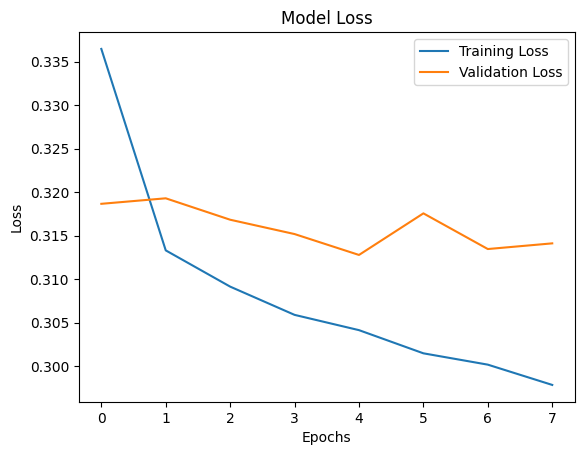

In [275]:
# Plotting the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [276]:
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)
# Convert predicted probabilities to binary predictions (0 or 1)
y_pred_binary_train = (y_pred_train > 0.5).astype(int)
y_pred_binary = (y_pred > 0.5).astype(int)
accuracy_train = accuracy_score(
            y_true    = y_train,
            y_pred    = y_pred_binary_train,
            normalize = True
           )
accuracy_test = accuracy_score(
            y_true    = y_test,
            y_pred    = y_pred_binary,
            normalize = True
           )
print("\n Accuracy in train 1s: {:.2f} %".format(100 * accuracy_train))
print("\n Accuracy in test 1s: {:.2f} %".format(100 * accuracy_test))

# Print classification report
print(classification_report(y_test, y_pred_binary))

204/204 [==============================] - 0s 347us/step

 Accuracy in train 1s: 86.32 %

 Accuracy in test 1s: 85.26 %
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      4918
           1       0.74      0.61      0.67      1595

    accuracy                           0.85      6513
   macro avg       0.81      0.77      0.79      6513
weighted avg       0.85      0.85      0.85      6513

